<a href="https://colab.research.google.com/github/ferjozsot23/Machine-Learning-Projects/blob/main/K_MEANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fernando José Soto Jácome

# Objetivos
1. Comprender las diferencias de clasificación supervisada y no supervisada para aplicar los correctos algoritmos
1. Aplicar K-means a una tarea de clasificación no supervisada con diferentes valores de K.
2. Graficar los clusters de las observaciones y sus respectivos centroids

# Introducción
Los algoritmos de aprendizaje automático se pueden clasificar generalmente en dos categorías: aprendizaje supervisado y no supervisado. La diferencia entre ellos ocurre debido a la presencia de la variable target. En el aprendizaje no supervisado, no hay una variable objetivo. El conjunto de datos solo tiene variables de entrada que describen los datos. Esto se llama aprendizaje no supervisado.

K-Means es el algoritmo de aprendizaje no supervisado más popular. Se utiliza cuando tenemos datos sin etiquetar que son datos sin categorías o grupos definidos. El algoritmo sigue una forma fácil de clasificar un conjunto de datos dado a través de un cierto número de clústeres, fijados de manera intencional. El algoritmo K-Means funciona de forma iterativa para asignar cada punto de datos a uno de los K grupos en función de las características que se proporcionan. Los puntos de datos se agrupan en función de la similitud de características.

En este informe se realizará una tarea de clasificación no supervisado mediante el algoritmo de K-means utilizando un dataset de clientes de un supermercado.


# Ejercicios presentados

# Ejercicios Python

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics


# K-MEANS

Dataset obtenido de https://www.kaggle.com/code/kushal1996/customer-segmentation-k-means-analysis/data

Dataset que contiene información de clientes de un mall determinado

In [ ]:
cust_df = pd.read_csv('Mall_Customers.csv')
cust_df.set_index('CustomerID', inplace=True)

In [ ]:
cust_df.head(3)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6


In [ ]:
cust_df.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [ ]:
X = cust_df.iloc[:,2:4]

In [ ]:
# FEATURES: Annual Income (k$) - Spending Score (1-100)
X.head(3)

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6


In [ ]:
X = np.array(X)

([], [])

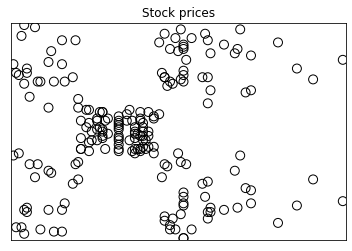

In [ ]:
plt.figure()
plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none', edgecolors='black', s=80)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
plt.title('Stock prices')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

Se puede distinguir un aproximado de 5 clusters

# Creación del objeto kmeans

# K = 3

In [ ]:
num_clusters = 3

In [ ]:
# Create KMeans object
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)
#n_init int, predeterminado=10
#Número de veces que se ejecutará el algoritmo k-means con semillas de centroide diferentes.
#Los resultados finales serán la mejor salida de n_init ejecuciones consecutivas.

In [ ]:
X.shape

(200, 2)

In [ ]:
kmeans.fit(X)

KMeans(n_clusters=3)

In [ ]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [ ]:
kmeans.cluster_centers_

array([[44.15447154, 49.82926829],
       [86.53846154, 82.12820513],
       [87.        , 18.63157895]])

#### Se desea saber a qué clusters pertenecen las siguientes observaciones

In [ ]:
kmeans.predict([[15, 39],[15,81]])

array([0, 0])

Se añadirá cada observación al cluster que pertenece

In [ ]:

labels = kmeans.labels_
clusters = {}
n = 0
for item in labels:
    if item in clusters:
        clusters[item].append(X[n])
    else:
        clusters[item] = [X[n]]
    n +=1

Se imprime cada cluster con sus observaciones pertenecientes

### Gráfico de los clusters

In [ ]:
# Se define el tamaño de paso de la malla
step_size = 0.01

# Se define la cuadrícula de puntos para trazar los límites
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_vals, y_vals = np.meshgrid(np.arange(x_min, x_max, step_size),
        np.arange(y_min, y_max, step_size))

In [ ]:
x_vals

array([[ 14.  ,  14.01,  14.02, ..., 137.97, 137.98, 137.99],
       [ 14.  ,  14.01,  14.02, ..., 137.97, 137.98, 137.99],
       [ 14.  ,  14.01,  14.02, ..., 137.97, 137.98, 137.99],
       ...,
       [ 14.  ,  14.01,  14.02, ..., 137.97, 137.98, 137.99],
       [ 14.  ,  14.01,  14.02, ..., 137.97, 137.98, 137.99],
       [ 14.  ,  14.01,  14.02, ..., 137.97, 137.98, 137.99]])

In [ ]:
output = kmeans.predict(np.c_[x_vals.ravel(), y_vals.ravel()])

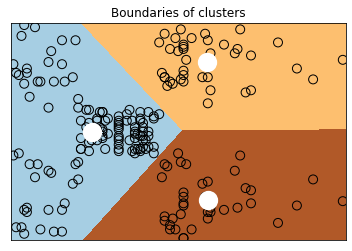

In [ ]:
# Plot different regions and color them
output = output.reshape(x_vals.shape)
plt.figure()
plt.clf()
plt.imshow(output, interpolation='nearest',
           extent=(x_vals.min(), x_vals.max(),
               y_vals.min(), y_vals.max()),
           cmap=plt.cm.Paired,
           aspect='auto',
           origin='lower')

# Overlay input points
plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none',
        edgecolors='black', s=80)

# Plot the centers of clusters
cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:,0], cluster_centers[:,1],
        marker='o', s=300, linewidths=2, color='white',
        zorder=12, facecolors='white')

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
plt.title('Boundaries of clusters')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

# K = 5

In [ ]:
num_clusters = 5

In [ ]:
# Create KMeans object
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)
#n_init int, predeterminado=10
#Número de veces que se ejecutará el algoritmo k-means con semillas de centroide diferentes.
#Los resultados finales serán la mejor salida de n_init ejecuciones consecutivas.

In [ ]:
# Se le entrena
kmeans.fit(X)

KMeans(n_clusters=5)

In [ ]:
kmeans.labels_

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0,
       4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [ ]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348]])

#### Se desea saber a qué clusters pertenecen las siguientes observaciones

In [ ]:
kmeans.predict([[15, 39],[15,81]])

array([4, 1])

Se añadirá cada observación al cluster que pertenece

In [ ]:

labels = kmeans.labels_
clusters = {}
n = 0
for item in labels:
    if item in clusters:
        clusters[item].append(X[n])
    else:
        clusters[item] = [X[n]]
    n +=1

Se imprime cada cluster con sus observaciones pertenecientes

### Gráfico de los clusters

In [ ]:
# Se define el tamaño de paso de la malla
step_size = 0.01

# Se define la cuadrícula de puntos para trazar los límites
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_vals, y_vals = np.meshgrid(np.arange(x_min, x_max, step_size),
        np.arange(y_min, y_max, step_size))

In [ ]:
x_vals

array([[ 14.  ,  14.01,  14.02, ..., 137.97, 137.98, 137.99],
       [ 14.  ,  14.01,  14.02, ..., 137.97, 137.98, 137.99],
       [ 14.  ,  14.01,  14.02, ..., 137.97, 137.98, 137.99],
       ...,
       [ 14.  ,  14.01,  14.02, ..., 137.97, 137.98, 137.99],
       [ 14.  ,  14.01,  14.02, ..., 137.97, 137.98, 137.99],
       [ 14.  ,  14.01,  14.02, ..., 137.97, 137.98, 137.99]])

In [ ]:
x_vals.shape

(10000, 12400)

In [ ]:
y_vals.shape

(10000, 12400)

In [ ]:
output = kmeans.predict(np.c_[x_vals.ravel(), y_vals.ravel()])

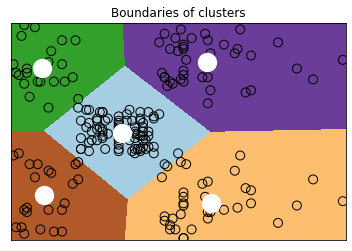

In [ ]:
# Plot different regions and color them
output = output.reshape(x_vals.shape)
plt.figure()
plt.clf()
plt.imshow(output, interpolation='nearest',
           extent=(x_vals.min(), x_vals.max(),
               y_vals.min(), y_vals.max()),
           cmap=plt.cm.Paired,
           aspect='auto',
           origin='lower')

# Overlay input points
plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none',
        edgecolors='black', s=80)

# Plot the centers of clusters
cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:,0], cluster_centers[:,1],
        marker='o', s=300, linewidths=2, color='white',
        zorder=12, facecolors='white')

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
plt.title('Boundaries of clusters')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

# K = 7

In [ ]:
num_clusters = 7

In [ ]:
# Create KMeans object
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)
#n_init int, predeterminado=10
#Número de veces que se ejecutará el algoritmo k-means con semillas de centroide diferentes.
#Los resultados finales serán la mejor salida de n_init ejecuciones consecutivas.

In [ ]:
X.shape

(200, 2)

In [ ]:
kmeans.fit(X)

KMeans(n_clusters=7)

In [ ]:
kmeans.labels_

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 5, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 5, 1, 5, 5,
       3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 0, 5, 0, 5, 5, 0, 0, 5, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6,
       4, 6])

In [ ]:
kmeans.cluster_centers_

array([[ 62.73469388,  46.91836735],
       [ 24.95      ,  81.        ],
       [ 78.03571429,  81.89285714],
       [ 25.14285714,  19.52380952],
       [ 89.40625   ,  15.59375   ],
       [ 45.51282051,  51.51282051],
       [108.18181818,  82.72727273]])

#### Se desea saber a qué clusters pertenecen las siguientes observaciones

In [ ]:
kmeans.predict([[15, 39],[15,81]])

array([3, 1])

Se añadirá cada observación al cluster que pertenece

In [ ]:

labels = kmeans.labels_
clusters = {}
n = 0
for item in labels:
    if item in clusters:
        clusters[item].append(X[n])
    else:
        clusters[item] = [X[n]]
    n +=1

Se imprime cada cluster con sus observaciones pertenecientes

### Gráfico de los clusters

In [ ]:
# Se define el tamaño de paso de la malla
step_size = 0.01

# Se define la cuadrícula de puntos para trazar los límites
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_vals, y_vals = np.meshgrid(np.arange(x_min, x_max, step_size),
        np.arange(y_min, y_max, step_size))

In [ ]:
x_vals

array([[ 14.  ,  14.01,  14.02, ..., 137.97, 137.98, 137.99],
       [ 14.  ,  14.01,  14.02, ..., 137.97, 137.98, 137.99],
       [ 14.  ,  14.01,  14.02, ..., 137.97, 137.98, 137.99],
       ...,
       [ 14.  ,  14.01,  14.02, ..., 137.97, 137.98, 137.99],
       [ 14.  ,  14.01,  14.02, ..., 137.97, 137.98, 137.99],
       [ 14.  ,  14.01,  14.02, ..., 137.97, 137.98, 137.99]])

In [ ]:
x

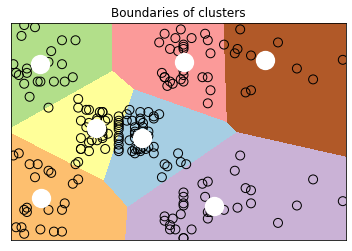

In [ ]:
# Plot different regions and color them
output = output.reshape(x_vals.shape)
plt.figure()
plt.clf()
plt.imshow(output, interpolation='nearest',
           extent=(x_vals.min(), x_vals.max(),
               y_vals.min(), y_vals.max()),
           cmap=plt.cm.Paired,
           aspect='auto',
           origin='lower')

# Overlay input points
plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none',
        edgecolors='black', s=80)

# Plot the centers of clusters
cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:,0], cluster_centers[:,1],
        marker='o', s=300, linewidths=2, color='white',
        zorder=12, facecolors='white')

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
plt.title('Boundaries of clusters')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

# Conclusiones

1. Se determina que K-means es una técnica de clasificación no supervisada que permite de manera iterativa agrupar a observaciones con un número de clusters dado
1. Se concluye que la creación de muchos clusters no es necesario, por ello realizar un scatter plot de las observaciones es importante para designar un número aproximado de agrupaciones
1. Se concluye que graficar el diccionario clusters permite visualizar de manera rápida y efectiva la diferenciación entre diferentes agrupaciones, así como también su centroid correspondiente

# Bibliografía

1. prashant111. (2020, December 8). K-Means Clustering with Python. Kaggle.com; Kaggle. https://www.kaggle.com/code/prashant111/k-means-clustering-with-python

1. Redwan Hossain Arnob. (2020, July 10). MemoryError: Unable to allocate MiB for an array with shape and data type, when using anymodel.fit() in sklearn. Stack Overflow. https://stackoverflow.com/questions/62839068/memoryerror-unable-to-allocate-mib-for-an-array-with-shape-and-data-type-when

1. sklearn.cluster.KMeans. (2022). Scikit-Learn. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

